Click  `Restart the kernel and run all cells` to install dependancies and run a test.

In [1]:
!python3 -m pip install -r requirements.txt

Looking in indexes: https://artifactory.vgt.vito.be/api/pypi/python-packages/simple, https://artifactory.vgt.vito.be/api/pypi/python-packages/simple

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import openeo
from openeo.processes import process

url = "https://openeo.cloud"
connection = openeo.connect(url).authenticate_oidc()

spatial_extent_sansa = {
    "east": 28.275,
    "north": -25.740,
    "south": -25.755,
    "west": 28.260,
}

datacube = connection.load_collection(
    collection_id="SENTINEL2_L2A",
    bands=["B04", "B03", "B02"],
    spatial_extent=spatial_extent_sansa,
    temporal_extent=["2024-03-05", "2024-03-07"],
)
# Scale values for better visualisation
datacube = datacube / 2500

datacube.download("out-Pretoria.tiff")

Authenticated using refresh token.


In [3]:
import rasterio
dataset = rasterio.open("out-Pretoria.tiff")
dataset.read()

array([[[0.3544, 0.3512, 0.2968, ..., 0.404 , 0.4336, 0.4448],
        [0.452 , 0.2164, 0.1384, ..., 0.292 , 0.3232, 0.3376],
        [0.4184, 0.2012, 0.156 , ..., 0.4384, 0.424 , 0.4076],
        ...,
        [0.1296, 0.2044, 0.302 , ..., 0.4624, 0.5336, 0.3832],
        [0.1432, 0.2572, 0.29  , ..., 0.4352, 0.5624, 0.4464],
        [0.1328, 0.1616, 0.194 , ..., 0.4592, 0.5208, 0.4576]],

       [[0.3056, 0.3032, 0.2832, ..., 0.3596, 0.3728, 0.394 ],
        [0.3984, 0.2344, 0.1888, ..., 0.2788, 0.2912, 0.32  ],
        [0.3996, 0.2184, 0.2092, ..., 0.3296, 0.3312, 0.3268],
        ...,
        [0.184 , 0.234 , 0.3364, ..., 0.3816, 0.4808, 0.388 ],
        [0.1992, 0.2452, 0.3176, ..., 0.3748, 0.5088, 0.4656],
        [0.1624, 0.1768, 0.2656, ..., 0.392 , 0.4512, 0.3968]],

       [[0.246 , 0.2392, 0.1984, ..., 0.28  , 0.2832, 0.2968],
        [0.336 , 0.1552, 0.096 , ..., 0.182 , 0.196 , 0.2244],
        [0.2704, 0.1224, 0.1236, ..., 0.2288, 0.2092, 0.2072],
        ...,
        [0.1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


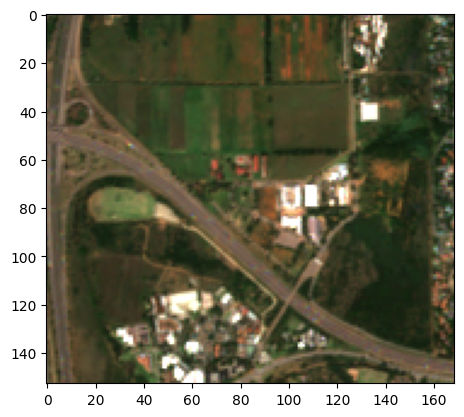

In [4]:
import matplotlib.pyplot as plt
plt.imshow(dataset.read().T)
plt.show()